## CC3_Project2_Oh
Develop a model to extract hidden patterns from large amounts of data (of your 
choice from Kaggle) using unsupervised learning techniques.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# display automatically with anything plt 
%matplotlib inline 

df = pd.read_csv('cardekho.csv')

In [74]:
# Data Analysis
display(df.nunique(),df.info(),df.describe().T,
    df.head(),df.tail(),df.isnull().sum(), 100*round((df.isnull().sum()/len(df)),4),df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


name                  2058
year                    29
selling_price          677
km_driven              921
fuel                     4
seller_type              3
transmission             2
owner                    5
mileage(km/ltr/kg)     381
engine                 121
max_power              320
seats                    9
dtype: int64

None

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.00,2015.0,2017.00,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.00,450000.0,675000.00,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.00,60000.0,98000.00,2360457.0
mileage(km/ltr/kg),7907.0,19.418783,4.037145,0.0,16.78,19.3,22.32,42.0
engine,7907.0,1458.625016,503.916303,624.0,1197.00,1248.0,1582.00,3604.0
seats,7907.0,5.416719,0.959588,2.0,5.00,5.0,5.00,14.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

name                  0.00
year                  0.00
selling_price         0.00
km_driven             0.00
fuel                  0.00
seller_type           0.00
transmission          0.00
owner                 0.00
mileage(km/ltr/kg)    2.72
engine                2.72
max_power             2.65
seats                 2.72
dtype: float64

(8128, 12)

In [75]:
# convert to float
def convert_float(x):
    try:
        return float(x)
    except:
        return np.nan

df["max_power"] = df["max_power"].apply(convert_float)

In [86]:
# Dealing with missing values - replacing with median values
missing = ['mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']
for i in missing:
    df[i].fillna(df[i].median(), inplace=True)

In [77]:
# Extracting car brand names
df["brand"] = df["name"].apply(lambda x: x.split()[0])
df["brand"]

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: brand, Length: 8128, dtype: object

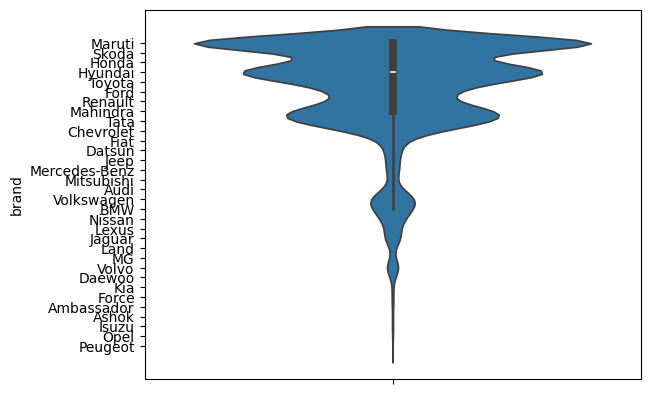

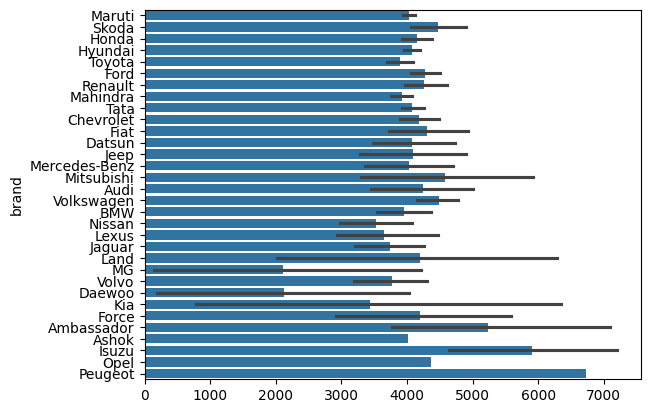

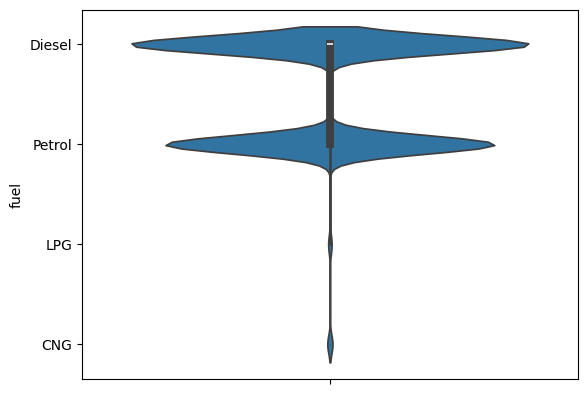

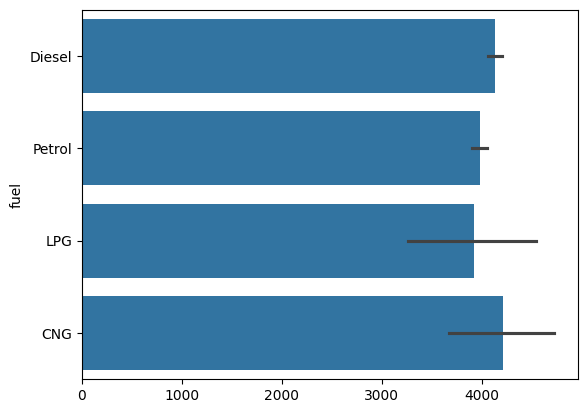

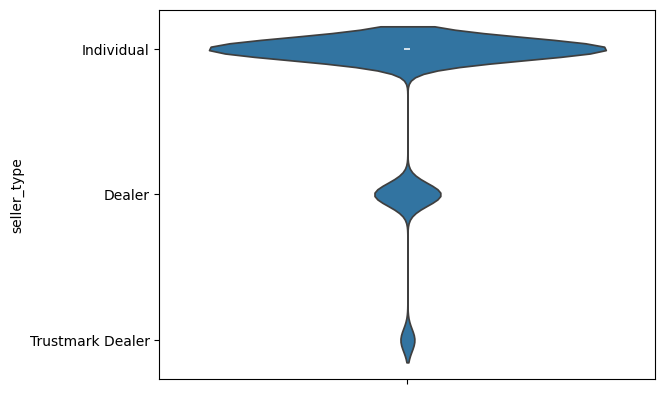

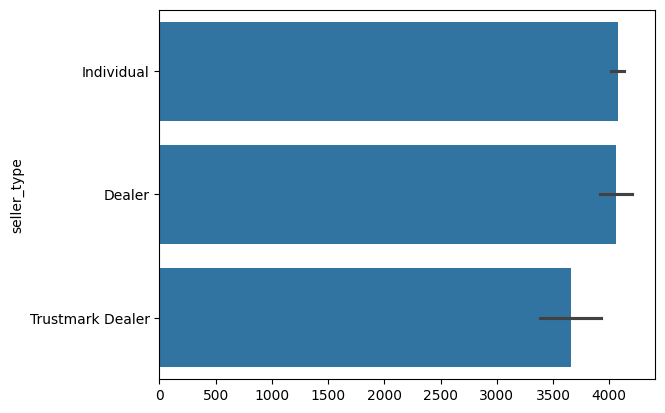

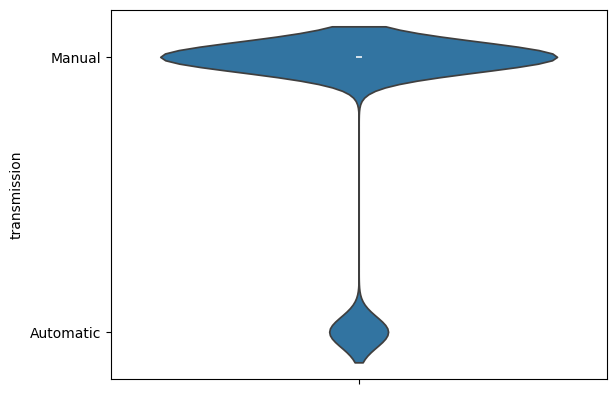

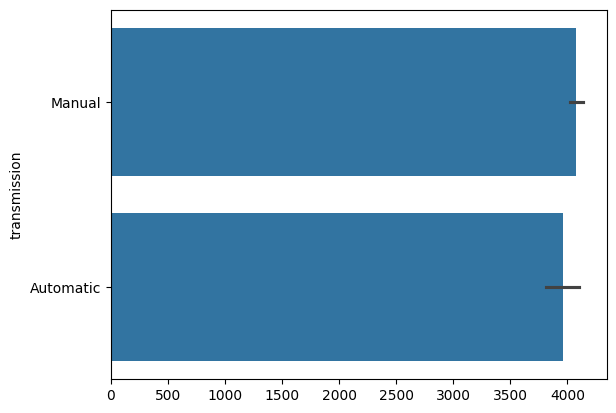

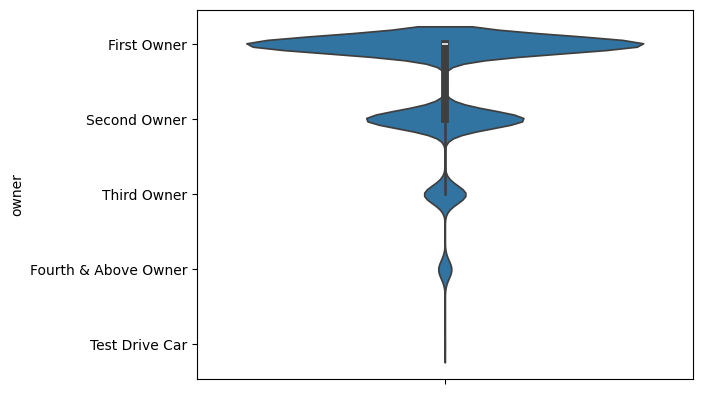

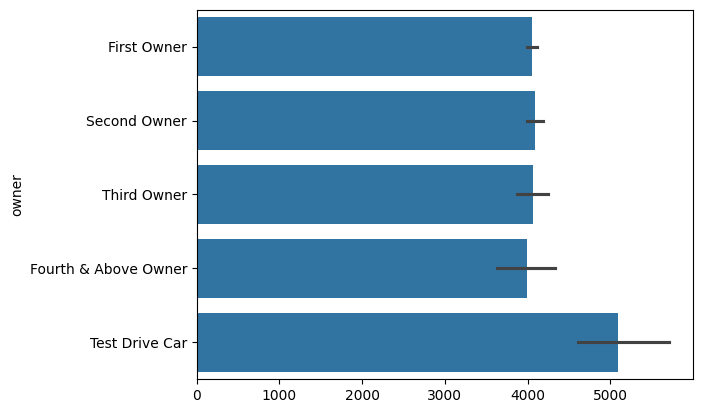

In [78]:
# Categories and their count in the dataset
categoricals = ["brand", "fuel", "seller_type", "transmission", "owner"]
for i in categoricals:
    sns.violinplot(data=df[i]) # very good to see density of each categories
    plt.show()
    sns.barplot(data=df[i]) # visually not helpful
    plt.show()

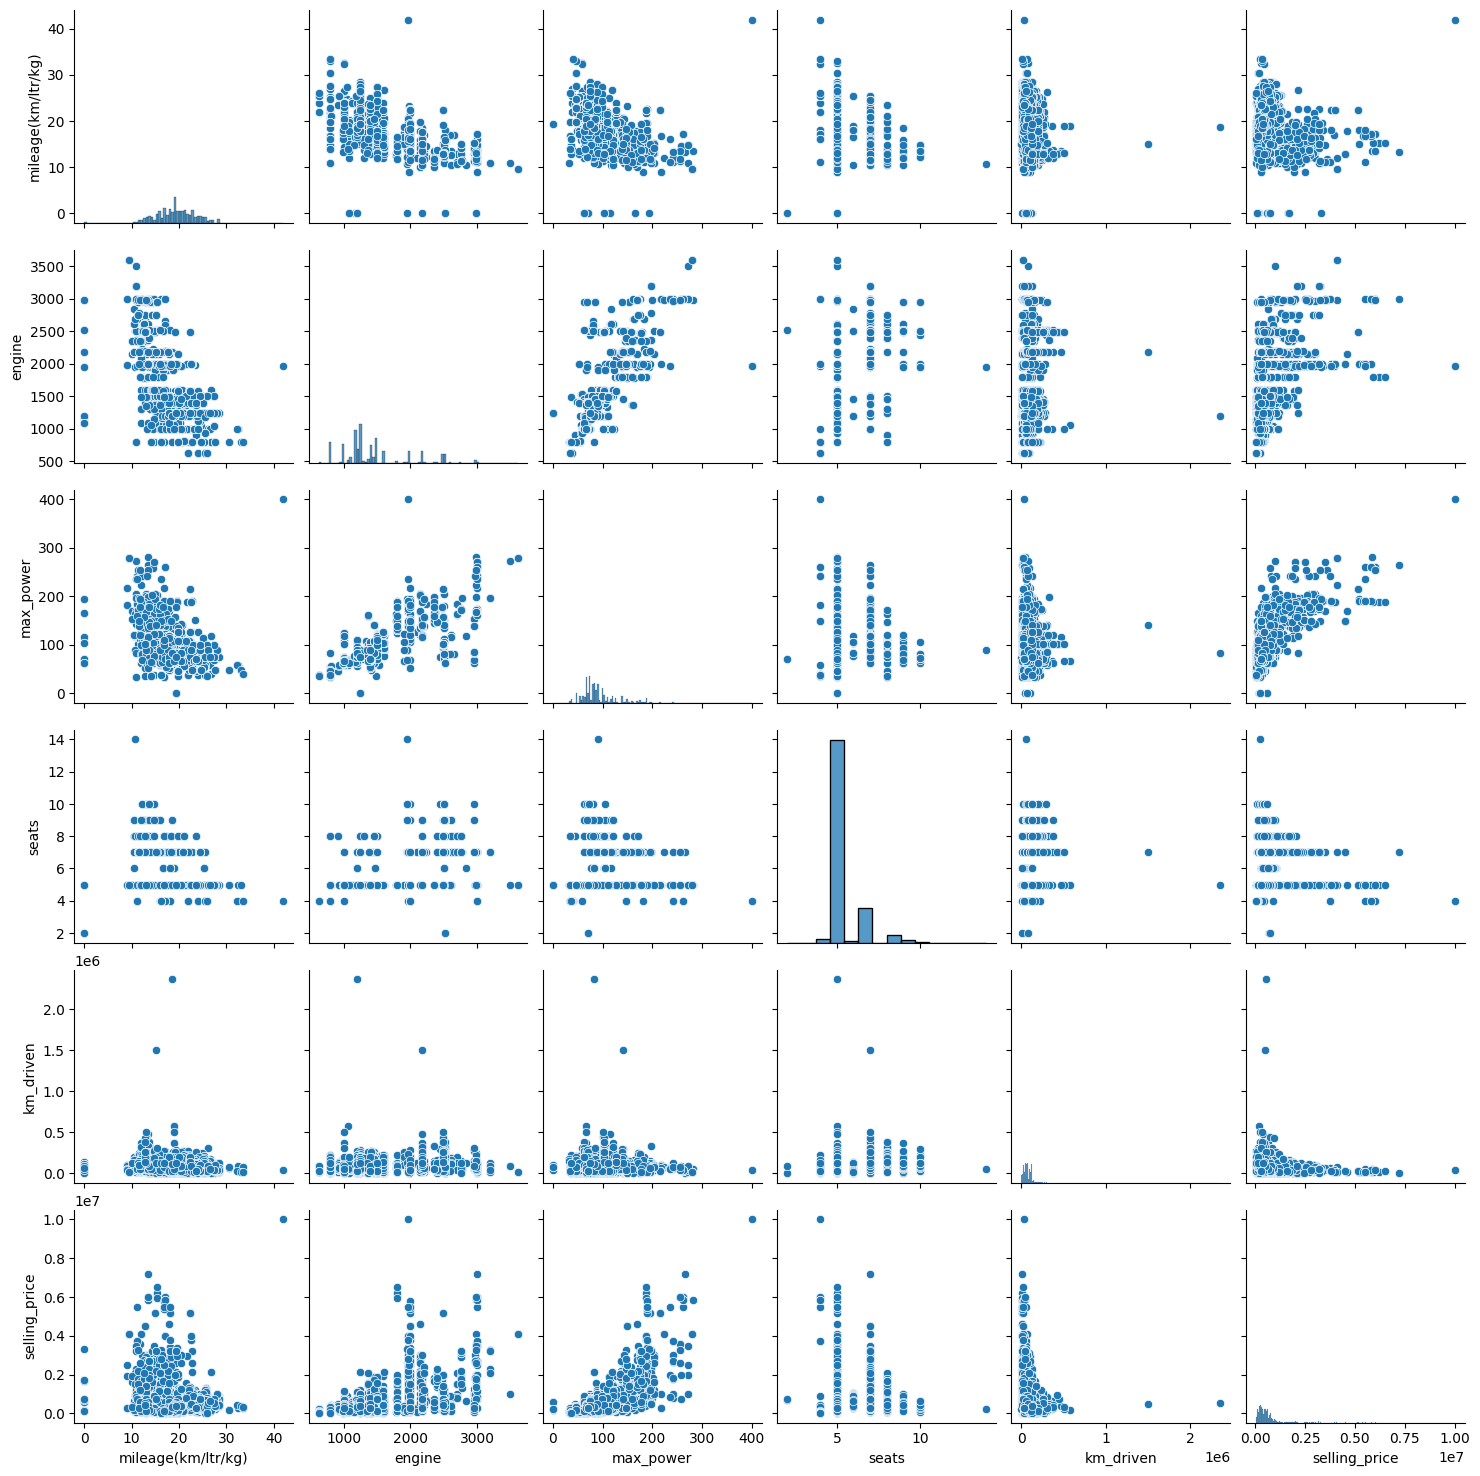

In [79]:
numericals = ["mileage(km/ltr/kg)", "engine", "max_power", "seats", "km_driven", "selling_price"]
sns.pairplot(data=df[numericals])

<Axes: >

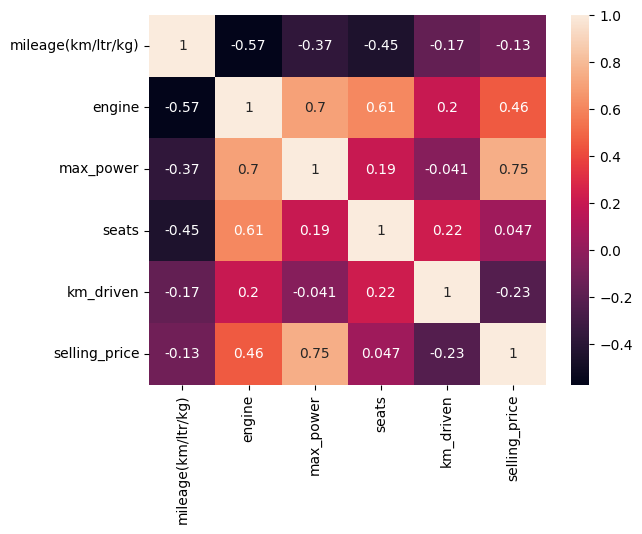

In [80]:
# correlation matrix or heatmap; .corr() applies correlation
sns.heatmap(data=df[numericals].corr(), annot=True)

<Axes: xlabel='year', ylabel='selling_price'>

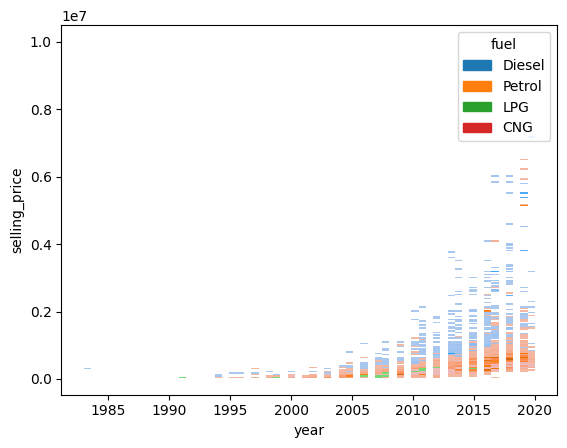

In [81]:
# understand about year, selling price, and fuel
sns.histplot(data=df, x='year', y='selling_price', hue='fuel')

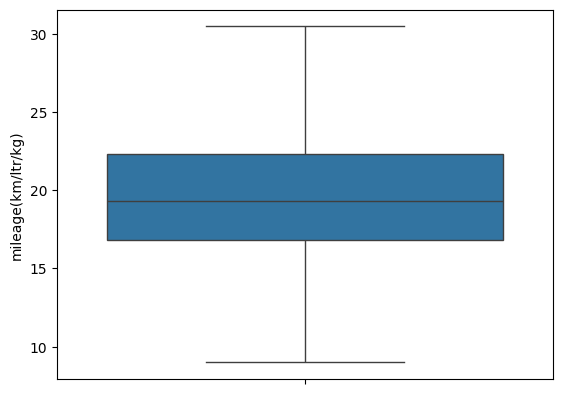

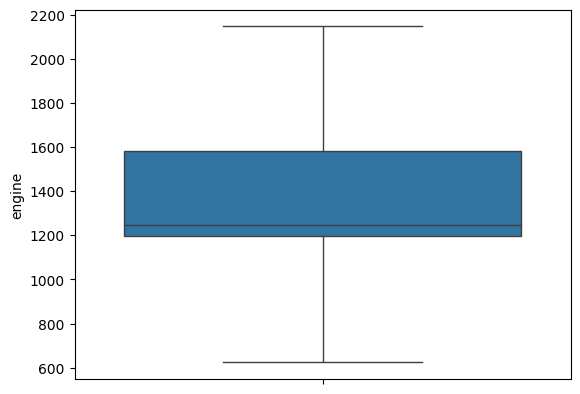

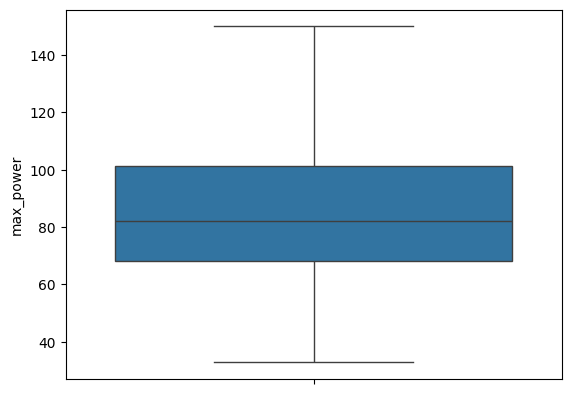

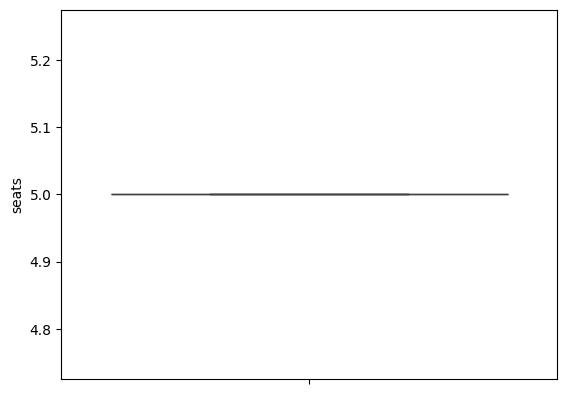

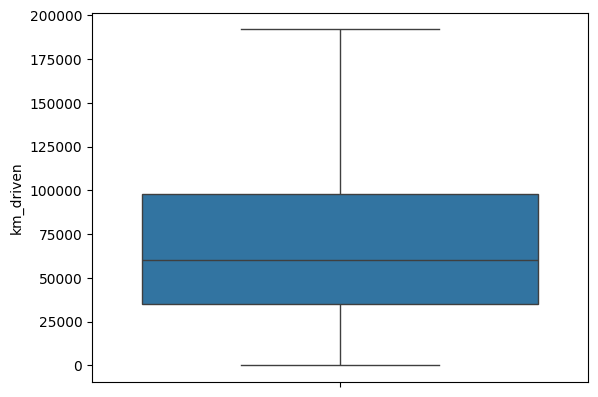

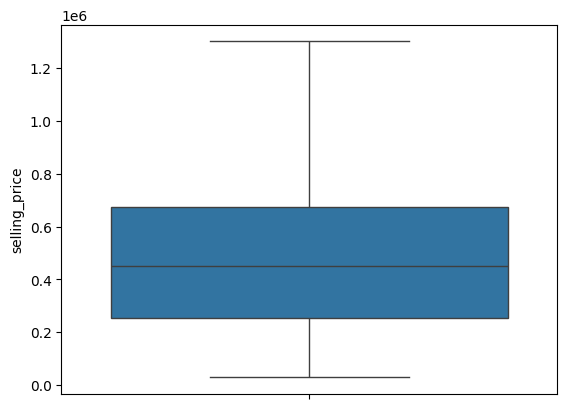

In [82]:
for i in numericals:
    sns.boxplot(data=df[i], showfliers=False)
    plt.show()

In [87]:
# Prepare for one-hot encoding of categorical variables
categorical_vars = ['fuel', 'seller_type', 'transmission', 'owner']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Note: 'drop_first=True' is used to avoid the dummy variable trap by dropping one of the encoded columns

# Display the transformed dataframe and ensure there are no missing values
display(df.head(), df.isnull().sum() )

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti


name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
brand                 0
dtype: int64

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.640548587324137


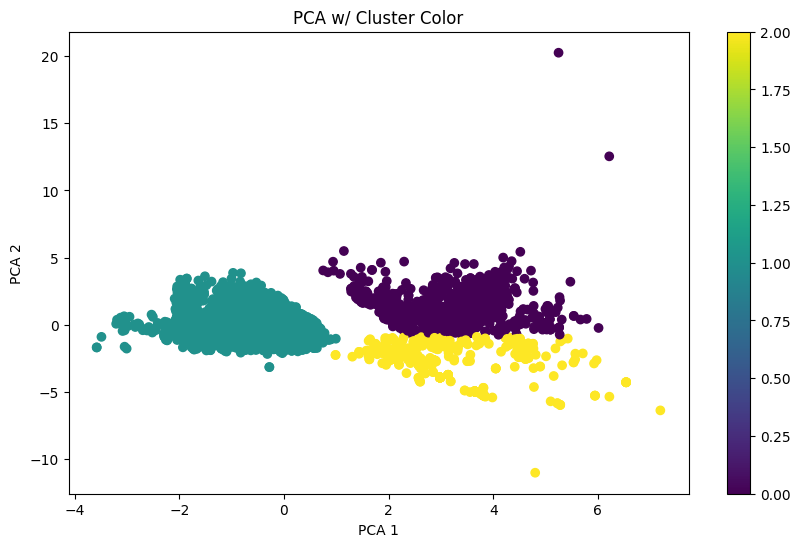

In [95]:
# Feature Scaling
# transform applies each features a standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Dimensionality Reduction with PCA
pca = PCA(n_components=2) 
pca_features = pca.fit_transform(scaled_features)

# Clustering with K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  
cluster_labels = kmeans.fit_predict(pca_features)

# Evaluation with Silhouette Score
silhouette_avg = silhouette_score(pca_features, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Visualizing the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA w/ Cluster Color')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

In [115]:
df['brand'].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64